# Website Phishing

## Group Members:
#### Dino Anastasopoulos: 1900661

#### Timothy Walters: 1855167

#### Razeen Gani: 1842173

#### Reece James Peters: 1924514

## Library imports

In [618]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Attributes

## Create empty design matrix

In [619]:
designMatrix = pd.DataFrame(columns = [
    'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',
    'Class',
] ) 

## Import data and populate designMatrix

In [620]:
lineNum = 0

for line in open("Files/data.txt", "r"):
    lineSplit = line.strip().split(",")
    designMatrix.loc[lineNum] = lineSplit   
    lineNum+=1
    
designMatrix

,SFH,PopUpWindow,SSL_Final_State,Request_URL,URL_of_Anchor,Web_Traffic,URL_Length,Age_Of_Domain,IP_Address,Class
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


## Split into training, validation and testing data

In [621]:
trainData, testData = train_test_split(designMatrix, test_size = 0.4)

testData, valData = train_test_split(testData, test_size = 0.5)

In [622]:
print("trainData size: " + str(len(trainData)))
print("valData size: " + str(len(valData)))
print("testData size: " + str(len(testData)))

trainData size: 811
valData size: 271
testData size: 271


## Splitting the train,val and test data by their attributes and classes

In [623]:
train_x = trainData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]
#print(train_x)


train_y =trainData['Class']
OG_train_y=train_y
#print(train_y)

test_x =  testData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]

test_y =testData['Class']

val_x =  valData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]

val_y =valData['Class']

## Defining our logistic regression function, learning rate, tolerance and creating default "true" thetas

In [624]:
def h(x, θ): # Regression function
    return 1/(1+np.exp(-np.dot(x, θ))) # logistic regression using the dot product

l_rate = 0.00001
tol = 0.001

## Model 1: Create A Conversion Matrix 
#### We keep all y-values equal to 1 as 1 and we convert all y-values equal to 0 or -1 to 0

In [625]:
holder = train_y 
Con1 = np.copy(holder)
Con1 = Con1.reshape(holder.shape[0])

#print(Con1.shape)
#print(Con1) 
#print(Con1[87])

#Check if there are instances of -1 in dataset
if "-1" in Con1:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')

#Change all 0's and -1's to 0's, and all 1's remain unchanged
for x in range(Con1.shape[0]):    
    if Con1[x] == "-1" or Con1[x] == "0":
        Con1[x] = "0"

#Check that theres no instances of -1 in dataset
if "-1" in Con1:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
    
#print(Con1) 
#print(Con1[87])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


## Logistic Regression For Model 1

In [626]:
thetas1= np.ones(train_x.shape[1]) # initialize our parameters
thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas1)
print(thetas_old)
print(thetas1.shape)
print(thetas_old.shape)

model1_y = np.array(Con1,dtype = np.float64)
model1_y = model1_y.reshape(811,1)
print(model1_y[0])
print(model1_y.shape)
X = np.array(train_x, dtype = np.float64)  
print(X[0])
print(X.shape)

error1 = []
timeline1 = []
iterations1 = 0

while np.linalg.norm(abs(thetas1 - thetas_old)) > tol:
    thetas_old = thetas1
    
    for i in range(X.shape[0]): 
        thetas1 = thetas1 - l_rate*( (h(X[i], thetas1) - model1_y[i]) * X[i] ) 

     
    if iterations1%50 == 0:                              
        j = 0.5 * pow(model1_y[i] - h(X[i], thetas1), 2) 
        error1.append(j)
        timeline1.append(iterations1)   
        #print("Error:" + str(error))
        #print("Timeline: " + str(timeline))
        #print()       

    iterations1 = iterations1+1   
        
print(iterations1)        
print("Model Parameters: ", thetas1)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[0.]
(811, 1)
[ 1.  1. -1. -1.  1. -1.  0.  1.  0.]
(811, 9)
1070
Model Parameters:  [-1.1223684  -0.25631862 -0.69224021  0.07798983 -0.10842332  1.12586887
  0.08603116  0.26425131  0.7513116 ]


### Plot Model 1 error

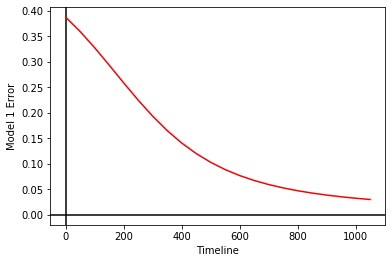

In [627]:
size = len(error1)

x1_time = np.zeros(size)
y1_error= np.zeros(size) 

for i in range(0, size):
    x1_time[i] = timeline1[i]
    y1_error[i] = error1[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 1 Error')
plt.plot(x1_time, y1_error, color="red")

## Model 2: Create A Conversion Matrix

##### We keep all y-values equal to 0 as 1 and we convert all y-values equal to 1 or -1 to 0

In [628]:
holder = train_y 
Con2 = np.copy(holder)
Con2 = Con2.reshape(holder.shape[0])

#print(Con2.shape)
#print(Con2)
#print(Con2[19])
#print(Con2[33])

#Check if there are instances of -1 in dataset
if "-1" in Con2:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')
    
#Change all 0's to 1's, and change all 1's and -1's to 0's
for x in range(Con2.shape[0]):    
    if Con2[x] == "0":
        Con2[x] = 1
    elif Con2[x] == "1" or Con2[x] == "-1":
        Con2[x] = 0         

#Check that theres no instances of -1 in dataset
if "-1" in Con2:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
                
#print(Con2)
#print(Con2[19])
#print(Con2[33])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


## Logistic Regression For Model 2

In [629]:
thetas2= np.ones(train_x.shape[1]) # initialize our parameters
thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas2)
print(thetas_old)
print(thetas2.shape)
print(thetas_old.shape)

model2_y = np.array(Con2,dtype = np.float64)
model2_y = model2_y.reshape(811,1)
print(model2_y[0])
print(model2_y.shape)
X2 = np.array(train_x, dtype = np.float64)  
print(X2[0])
print(X2.shape)

error2 = []
timeline2 = []
iterations2 = 0

while np.linalg.norm(abs(thetas2 - thetas_old)) > tol:
    thetas_old = thetas2
    for i in range(X2.shape[0]): 
        thetas2 = thetas2 - l_rate*( (h(X2[i], thetas2) - model2_y[i]) * X2[i] )
        
    if iterations2%50 == 0:                              
        j = 0.5 * pow(model2_y[i] - h(X2[i], thetas2), 2) 
        error2.append(j)
        timeline2.append(iterations2)   
        #print("Error:" + str(error2))
        #print("Timeline: " + str(timeline2))
        #print()       

    iterations2 = iterations2+1   
        
print(iterations2)        
print("Model Parameters: ", thetas2)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[0.]
(811, 1)
[ 1.  1. -1. -1.  1. -1.  0.  1.  0.]
(811, 9)
1007
Model Parameters:  [-0.56420275  0.96668564 -0.3147639   0.44583139 -0.06384024  0.66884317
  0.61532934  0.33178774  0.45770381]


### Plot Model 2 error

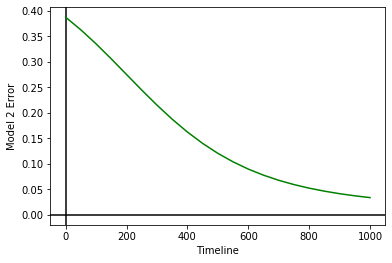

In [630]:
size = len(error2)

x2_time = np.zeros(size)
y2_error= np.zeros(size) 

for i in range(0, size):
    x2_time[i] = timeline2[i]
    y2_error[i] = error2[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 2 Error')
plt.plot(x2_time, y2_error, color="green")

## Model 3: Create A Conversion Matrix

##### We keep all y-values equal to -1 as 1 and we convert all y-values equal to 1 or 0 to 0

In [631]:
holder = train_y 
Con3 = np.copy(holder)
Con3 = Con3.reshape(holder.shape[0])

#print(Con3.shape)
#print(Con3)
#print(Con3[1])
#print(Con3[2])

#Check if there are instances of -1 in dataset
if "-1" in Con3:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')
    print(Con3)
    
#Change all -1's to 1's, and change all 1's and 0's to 0
for x in range(Con3.shape[0]):    
    if Con3[x] == "-1":
        Con3[x] = 1
    elif Con3[x] == "1" or Con3[x] == "0":
        Con3[x] = 0

#Check that theres no instances of -1 in dataset
if "-1" in Con3:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
        
#print(Con3)
#print(Con3[1])
#print(Con3[2])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


In [632]:
thetas3= np.ones(train_x.shape[1]) # initialize our parameters
thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas3)
print(thetas_old)
print(thetas3.shape)
print(thetas_old.shape)

model3_y = np.array(Con3,dtype = np.float64)
model3_y = model3_y.reshape(811,1)
print(model3_y[0])
print(model3_y.shape)
X3 = np.array(train_x, dtype = np.float64)  
print(X3[0])
print(X3.shape)

error3 = []
timeline3 = []
iterations3 = 0

while np.linalg.norm(abs(thetas3 - thetas_old)) > 0.0005:
    thetas_old = thetas3
    for i in range(X3.shape[0]): 
        thetas3 = thetas3 - l_rate*( (h(X3[i], thetas3) - model3_y[i]) * X3[i] )
  
    if iterations3%20 == 0:                              
        j = 0.5 * pow(model3_y[i] - h(X3[i], thetas3), 2) 
        error3.append(j)
        timeline3.append(iterations3)   
        #print("Error:" + str(error3))
        #print("Timeline: " + str(timeline3))
        #print()       

    iterations3 = iterations3 + 1   
        
print(iterations3)        
print("Model Parameters: ", thetas3) 

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[1.]
(811, 1)
[ 1.  1. -1. -1.  1. -1.  0.  1.  0.]
(811, 9)
1329
Model Parameters:  [1.24387873 1.43526306 1.05972767 0.94588281 0.5489341  0.75433154
 0.47677606 0.72644314 0.84482839]


### Plot Model 3 error

In [ ]:
size = len(error3)

x3_time = np.zeros(size)
y3_error= np.zeros(size) 

for i in range(0, size):
    x3_time[i] = timeline3[i]
    y3_error[i] = error3[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 3 Error')
plt.plot(x3_time, y3_error, color="blue")

In [ ]:
#Prints the predicted parameters for each model

print('Predicted Paramters For Model 1 ', thetas1)
print('Predicted Paramters For Model 2 ', thetas2)
print('Predicted Paramters For Model 3 ', thetas3)

In [ ]:
#Defines Softmax function

def f(X,thetas): # softmax function

    #Compute softmax values for each sets of scores in x.
    return np.exp(thetas) / np.sum(np.exp(np.dot(X, thetas)))

In [ ]:
#Plugs in thetas and training data to softmax function (Although not too sure about these values)

probability_m1 = f(X,thetas1)
probability_m2 = f(X2,thetas2)
probability_m3 = f(X3,thetas3)

print(probability_m1)
print(probability_m2)
print(probability_m3)

#Plugs in thetas and training data to softmax function (Although not too sure about these values)

probability_m1 = f(X,thetas1)
probability_m2 = f(X2,thetas2)
probability_m3 = f(X3,thetas3)

print(probability_m1)
print(probability_m2)
print(probability_m3)

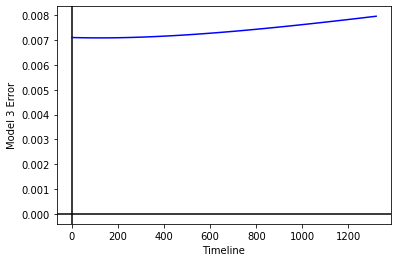

In [633]:
size = len(error3)

x3_time = np.zeros(size)
y3_error= np.zeros(size) 

for i in range(0, size):
    x3_time[i] = timeline3[i]
    y3_error[i] = error3[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 3 Error')
plt.plot(x3_time, y3_error, color="blue")

In [634]:
#Prints the predicted parameters for each model

print('Predicted Paramters For Model 1 ', thetas1)
print('Predicted Paramters For Model 2 ', thetas2)
print('Predicted Paramters For Model 3 ', thetas3)

Predicted Paramters For Model 1  [-1.1223684  -0.25631862 -0.69224021  0.07798983 -0.10842332  1.12586887
  0.08603116  0.26425131  0.7513116 ]
Predicted Paramters For Model 2  [-0.56420275  0.96668564 -0.3147639   0.44583139 -0.06384024  0.66884317
  0.61532934  0.33178774  0.45770381]
Predicted Paramters For Model 3  [1.24387873 1.43526306 1.05972767 0.94588281 0.5489341  0.75433154
 0.47677606 0.72644314 0.84482839]


In [635]:
#Defines Softmax function

def f(X,thetas): # softmax function

    #Compute softmax values for each sets of scores in x.
    return np.exp(thetas) / np.sum(np.exp(np.dot(X, thetas)))

In [636]:
#Plugs in thetas and training data to softmax function (Although not too sure about these values)

probability_m1 = f(X,thetas1)
probability_m2 = f(X2,thetas2)
probability_m3 = f(X3,thetas3)

print(probability_m1)
print(probability_m2)
print(probability_m3)

[0.00013578 0.00032283 0.00020876 0.00045098 0.00037428 0.00128602
 0.00045462 0.00054332 0.00088426]
[0.00070123 0.00324127 0.00089989 0.00192536 0.00115655 0.00240638
 0.00228099 0.00171784 0.00194835]
[1.93061529e-04 2.33782984e-04 1.60590538e-04 1.43310416e-04
 9.63574111e-05 1.18328156e-04 8.96493784e-05 1.15073764e-04
 1.29535970e-04]
